<a href="https://colab.research.google.com/github/AmartyaCodes/DogBreedClassification-/blob/main/dog_breed_identification_using_ResNet50V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries


In [ ]:
%%time
import tensorflow as tf
import pandas as pd
import numpy as np 
from keras_preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
import itertools 
import matplotlib.pyplot as plt
%matplotlib inline

CPU times: user 2.14 s, sys: 689 ms, total: 2.83 s
Wall time: 5.9 s


In [ ]:
%%time
#CREATING THE TRAINING AND TEST DIRECTORY 
train_dir = '../input/dog-breed-identification/train'
test_dir ='../input/dog-breed-identification/test'

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 22.6 µs


In [ ]:
#NOTICE THAT THE NAMES OF THE IMAGES LACK THE ".jpg" AND IN ORDER TO READ THE IMAGES WE NEED TO ADD IT, SINCE THE IMAGES ARE THERE IN jpg FORMAT
def append_ext(fn):
    return fn+".jpg"

In [ ]:
%%time
# def append_ext(fn):
#     return fn+".jpg"
traindf = pd.read_csv('../input/dog-breed-identification/labels.csv',dtype=str)
testdf = pd.read_csv('../input/dog-breed-identification/sample_submission.csv',dtype=str)



CPU times: user 315 ms, sys: 47.7 ms, total: 363 ms
Wall time: 606 ms


In [ ]:
traindf["id"] = traindf["id"].apply(append_ext)
testdf["id"] = testdf["id"].apply(append_ext)

In [ ]:
included_breed = ['beagle', 'chihuahua', 'doberman',
'french_bulldog', 'golden_retriever', 'malamute', 'pug', 'saint_bernard', 'scottish_deerhound',
'tibetan_mastiff']
for index,breed in traindf.iterrows():
    if breed[1] not in included_breed:
        traindf= traindf.drop([index])
traindf.shape
        

(841, 2)

# Training Labels

In [ ]:
traindf.head()

,id,breed
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever
9,0042188c895a2f14ef64a918ed9c7b64.jpg,scottish_deerhound
20,008b1271ed1addaccf93783b39deab45.jpg,doberman
25,00a366d4b4a9bbb6c8a63126697b7656.jpg,golden_retriever
37,0100f55e4f0fe28f2c0465d3fc4b9897.jpg,golden_retriever


# Test id or Sample Submission

In [ ]:
testdf.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333
1,00102ee9d8eb90812350685311fe5890.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333
2,0012a730dfa437f5f3613fb75efcd4ce.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333
3,001510bc8570bbeee98c8d80c8a95ec1.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333
4,001a5f3114548acdefa3d4da05474c2e.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333


# Training Images

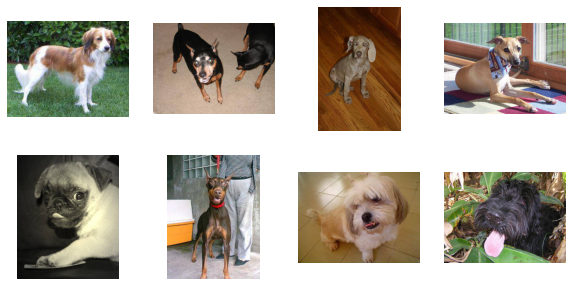

In [ ]:
import os 
src_path = "../input/dog-breed-identification/train"
sub_class = os.listdir(src_path)

fig = plt.figure(figsize=(10,5))
for e in range(len(sub_class[:8])):
    plt.subplot(2,4,e+1)
    img = plt.imread(os.path.join(src_path,sub_class[e]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.axis('off')

# Data preprocessing

In [ ]:
%%time
train_datagen=ImageDataGenerator( rescale=1./255.,
                                  rotation_range = 20,
                                  brightness_range=[0.2,1.0],
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  #shear_range = 0.2,
                                  #zoom_range = [0.7,1],
                                  horizontal_flip = True,
                                  #Setting validation split to 2% 
                                  validation_split=0.1
                                  )

CPU times: user 26 µs, sys: 2 µs, total: 28 µs
Wall time: 32.2 µs


In [ ]:
BATCH_SIZE = 32

In [ ]:
image_size=(224,224)

In [ ]:
train_generator=train_datagen.flow_from_dataframe(
dataframe=traindf,
directory=train_dir,
x_col="id",
y_col="breed",
subset="training",
batch_size=BATCH_SIZE,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=image_size,
color_mode="rgb" 
)

Found 757 validated image filenames belonging to 10 classes.


# Plotting Augmented images

In [ ]:
x,y = next(train_generator)

In [ ]:
print(type(x))
print(x.shape)
print(y.shape)

<class 'numpy.ndarray'>
(32, 224, 224, 3)
(32, 10)


In [ ]:
def show_grid(image_list,nrows,ncols,figsize=(10,10),showaxis='off'):
    
    image_list = [image_list[i,:,:,:] for i in range(image_list.shape[0])]
    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        ax.axis('off')
        

CPU times: user 1.46 s, sys: 17.1 ms, total: 1.48 s
Wall time: 1.48 s


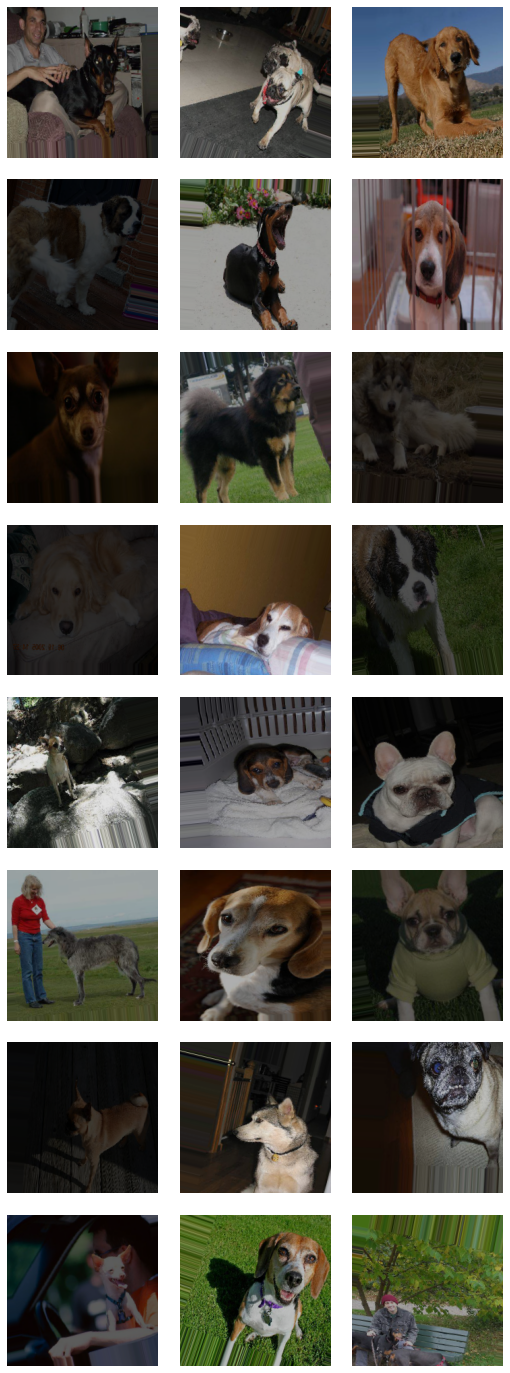

In [ ]:
%%time
show_grid(x,8,3,figsize=(25,25))


# Validation Data

In [ ]:
valid_generator=train_datagen.flow_from_dataframe(
dataframe=traindf,
directory=train_dir,
x_col="id",
y_col="breed",
subset="validation",
batch_size=BATCH_SIZE,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=image_size,
color_mode="rgb")


Found 84 validated image filenames belonging to 10 classes.


# Test Data

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=testdf,
directory=test_dir,
x_col="id",
y_col=None,
batch_size=BATCH_SIZE,
seed=42,
shuffle=False,
class_mode=None,
target_size=image_size,
color_mode="rgb")

Found 10357 validated image filenames.


# Pretrained model ResNet 50V2

In [ ]:
shape=(224,224,3) 

In [ ]:
classes = len(included_breed)
classes

10

In [ ]:
pretrained_model = tf.keras.applications.ResNet50V2(
        weights='imagenet',
        include_top=False ,
        input_shape=shape
    )
# pretrained_model.trainable = False
    
model = tf.keras.Sequential([ 
        pretrained_model,  
        tf.keras.layers.Flatten(),
#         tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(2048, activation='relu'),
        tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(512, activation='relu'),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(128, activation='relu'),
#         tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
    
        tf.keras.layers.Dense(10, activation='softmax')
    ])

94674944/94668760 [==============================] - 1s 0us/step


# CREATING OUR CUSTOM METRICS TO CALCULATE THE F1 SCORES

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred): 
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model

# fit the model
# history = model.fit(Xtrain, ytrain, validation_split=0.3, epochs=10, verbose=0)

# CREATING THE MODEL

In [ ]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.001)
opt=tf.keras.optimizers.Adam(lr=1e-4)
model.compile(optimizer= opt , loss='categorical_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# model.compile(optimizer = opt ,
#               loss="categorical_crossentropy",
#               metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 2048)              205522944 
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1

# Early stopping

In [ ]:
# reduce = tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss',factor=0.2,patience=5, min_lr=0.001 )

# early = tf.keras.callbacks.EarlyStopping( patience=2,
#                                           min_delta=0.001,
#                                           restore_best_weights=True)


# Fitting the Model:

In [ ]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10,
#                     callbacks=[early],
                   )

Epoch 1/10
23/23 [==============================] - 32s 985ms/step - loss: 3.7744 - acc: 0.1640 - f1_m: 0.1392 - precision_m: 0.1849 - recall_m: 0.1126 - val_loss: 1.2224 - val_acc: 0.5312 - val_f1_m: 0.5016 - val_precision_m: 0.7063 - val_recall_m: 0.3906
Epoch 2/10
23/23 [==============================] - 16s 698ms/step - loss: 2.0746 - acc: 0.3726 - f1_m: 0.3315 - precision_m: 0.4732 - recall_m: 0.2562 - val_loss: 1.3774 - val_acc: 0.5781 - val_f1_m: 0.4753 - val_precision_m: 0.7056 - val_recall_m: 0.3594
Epoch 3/10
23/23 [==============================] - 17s 732ms/step - loss: 1.4205 - acc: 0.5458 - f1_m: 0.5164 - precision_m: 0.7595 - recall_m: 0.3976 - val_loss: 0.6967 - val_acc: 0.8125 - val_f1_m: 0.7970 - val_precision_m: 0.9200 - val_recall_m: 0.7031
Epoch 4/10
23/23 [==============================] - 16s 690ms/step - loss: 0.9899 - acc: 0.6841 - f1_m: 0.6446 - precision_m: 0.8102 - recall_m: 0.5380 - val_loss: 0.6253 - val_acc: 0.8750 - val_f1_m: 0.8778 - val_precision_m: 0.

# Loss and Accuracy Curves

In [ ]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('MODEL '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

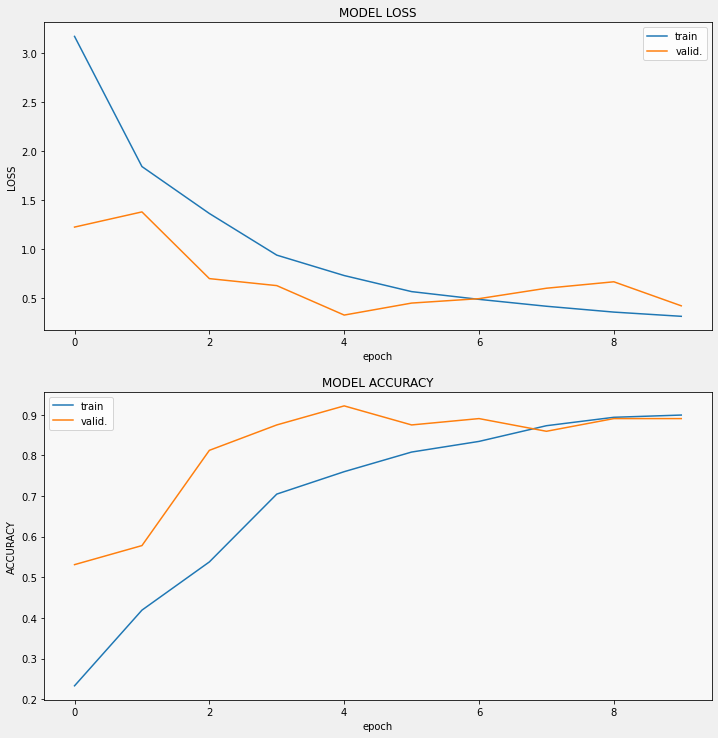

In [ ]:
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'LOSS',
    211,
)

display_training_curves(
    history.history['acc'],
    history.history['val_acc'],
    'ACCURACY',
    212,
)


# Accuracy

In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(valid_generator,batch_size=32)
# score = model.evaluate(valid_generator,batch_size=32)
# print("Accuracy: {:.2f}%".format(score[1] * 100)) 
# print("Loss: ",score[0])

print("Loss:", loss)
print("Accuracy:", accuracy)
print("F1 Score:", f1_score)



3/3 [==============================] - 2s 575ms/step - loss: 0.3433 - acc: 0.8929 - f1_m: 0.8859 - precision_m: 0.9083 - recall_m: 0.8646
Loss: 0.3433195650577545
Accuracy: 0.8928571343421936
F1 Score: 0.8858692049980164


In [ ]:
# model.save("DogClassification.h5")

# Predicting Test Images

In [ ]:
%%time
pred=model.predict(test_generator)

CPU times: user 44.2 s, sys: 3.55 s, total: 47.7 s
Wall time: 1min 38s


In [ ]:
df_submission = pd.read_csv('/kaggle/input/dog-breed-identification/sample_submission.csv', usecols= included_breed+['id'])
df_submission.head()


,id,beagle,chihuahua,doberman,french_bulldog,golden_retriever,malamute,pug,saint_bernard,scottish_deerhound,tibetan_mastiff
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [ ]:
df_submission.iloc[:,1:] = pred
df_submission.head()

,id,beagle,chihuahua,doberman,french_bulldog,golden_retriever,malamute,pug,saint_bernard,scottish_deerhound,tibetan_mastiff
0,000621fb3cbb32d8935728e48679680e,8.553617e-02,1.596119e-02,2.020172e-03,1.648294e-02,0.038053,3.921393e-02,8.418820e-03,7.733793e-01,0.004803,0.016132
1,00102ee9d8eb90812350685311fe5890,4.642390e-09,1.381339e-05,1.446923e-05,3.423236e-06,0.000004,9.997955e-01,4.322711e-06,1.682092e-07,0.000009,0.000155
2,0012a730dfa437f5f3613fb75efcd4ce,2.732643e-04,9.920771e-05,8.231018e-05,1.412464e-04,0.011498,1.761138e-03,1.105919e-03,1.611643e-04,0.984497,0.000381
3,001510bc8570bbeee98c8d80c8a95ec1,1.466668e-03,6.219775e-03,2.023913e-03,1.134285e-02,0.001838,2.526347e-03,3.565098e-01,4.138657e-03,0.607253,0.006682
4,001a5f3114548acdefa3d4da05474c2e,7.175468e-06,7.599062e-08,9.486611e-07,9.830198e-09,0.000002,5.198177e-08,3.254002e-09,1.200313e-05,0.045256,0.954722


# Submission

In [ ]:
%%time
df_submission.to_csv('Submission.csv')

CPU times: user 366 ms, sys: 14.8 ms, total: 381 ms
Wall time: 402 ms
